In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vardo
Processing Record 2 of Set 1 | togur
Processing Record 3 of Set 1 | fortuna
Processing Record 4 of Set 1 | viseu
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | onokhoy
Processing Record 7 of Set 1 | ostrovnoy
Processing Record 8 of Set 1 | ortigueira
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | kozhva
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | mayya
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | guerrero negro
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | lucapa
Processing Record 19 of Set 1 | alugan
Processing Record 20 of Set 1 | raymondville
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | abalak
Processing Record 

Processing Record 38 of Set 4 | ouesso
Processing Record 39 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 4 | bredasdorp
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | saint-georges
Processing Record 43 of Set 4 | chernyshevskiy
Processing Record 44 of Set 4 | lincoln
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | asau
Processing Record 47 of Set 4 | opole
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | zhigansk
Processing Record 50 of Set 4 | nisia floresta
Processing Record 1 of Set 5 | novobirilyussy
Processing Record 2 of Set 5 | warwick
Processing Record 3 of Set 5 | mehamn
Processing Record 4 of Set 5 | banepa
Processing Record 5 of Set 5 | caucaia
Processing Record 6 of Set 5 | port pirie
Processing Record 7 of Set 5 | los llanos de aridane
Processing Record 8 of Set 5 | kapoeta
Processing Record 9 of Set 5 | bambous virieux
Processing Record 10 of Set 5 | zaysan
Proces

Processing Record 25 of Set 8 | kangaatsiaq
Processing Record 26 of Set 8 | turukhansk
Processing Record 27 of Set 8 | mandalgovi
Processing Record 28 of Set 8 | yar-sale
Processing Record 29 of Set 8 | vao
Processing Record 30 of Set 8 | khunti
Processing Record 31 of Set 8 | lufilufi
Processing Record 32 of Set 8 | karsiyang
Processing Record 33 of Set 8 | narsaq
Processing Record 34 of Set 8 | victor harbor
Processing Record 35 of Set 8 | kiama
Processing Record 36 of Set 8 | bokoro
Processing Record 37 of Set 8 | edd
Processing Record 38 of Set 8 | kutum
Processing Record 39 of Set 8 | kanniyakumari
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | aksu
Processing Record 42 of Set 8 | savonlinna
Processing Record 43 of Set 8 | nouadhibou
Processing Record 44 of Set 8 | whitehorse
Processing Record 45 of Set 8 | khao wong
Processing Record 46 of Set 8 | komatipoort
Processing Record 47 of Set 8 | manzil salim
Processing Record 48 of Set 8 | babanusah
City not fou

Processing Record 13 of Set 12 | san patricio
Processing Record 14 of Set 12 | puerto del rosario
Processing Record 15 of Set 12 | kupang
Processing Record 16 of Set 12 | svetlyy
Processing Record 17 of Set 12 | okhotsk
Processing Record 18 of Set 12 | mochalishche
Processing Record 19 of Set 12 | mazyr
Processing Record 20 of Set 12 | barbar
City not found. Skipping...
Processing Record 21 of Set 12 | fuerte olimpo
Processing Record 22 of Set 12 | collie
Processing Record 23 of Set 12 | along
Processing Record 24 of Set 12 | sur
Processing Record 25 of Set 12 | bahia honda
Processing Record 26 of Set 12 | fairbanks
Processing Record 27 of Set 12 | schattdorf
Processing Record 28 of Set 12 | kurunegala
Processing Record 29 of Set 12 | mirabad
Processing Record 30 of Set 12 | vadso
Processing Record 31 of Set 12 | geraldton
Processing Record 32 of Set 12 | fort-shevchenko
Processing Record 33 of Set 12 | tessalit
Processing Record 34 of Set 12 | north bend
Processing Record 35 of Set 12

In [12]:
len(city_data)

544

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vardo,70.3705,31.1107,53.42,84,9,9.69,NO,2021-07-05 22:56:45
1,Togur,58.3631,82.8265,61.57,97,22,9.86,RU,2021-07-05 22:56:45
2,Fortuna,40.5982,-124.1573,70.86,79,40,3.00,US,2021-07-05 22:56:46
3,Viseu,40.6610,-7.9097,63.86,96,100,5.82,PT,2021-07-05 22:56:46
4,Arraial Do Cabo,-22.9661,-42.0278,68.58,68,31,8.61,BR,2021-07-05 22:56:46
5,Onokhoy,51.9320,108.0747,62.35,52,9,2.21,RU,2021-07-05 22:56:47
6,Ostrovnoy,68.0531,39.5131,62.56,74,12,22.59,RU,2021-07-05 22:56:47
7,Ortigueira,-24.2083,-50.9494,54.37,80,8,1.21,BR,2021-07-05 22:56:47
8,Tasiilaq,65.6145,-37.6368,38.35,85,93,4.56,GL,2021-07-05 22:56:47
9,Chokurdakh,70.6333,147.9167,45.75,80,100,15.23,RU,2021-07-05 22:56:48


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-07-05 22:56:45,70.3705,31.1107,53.42,84,9,9.69
1,Togur,RU,2021-07-05 22:56:45,58.3631,82.8265,61.57,97,22,9.86
2,Fortuna,US,2021-07-05 22:56:46,40.5982,-124.1573,70.86,79,40,3.00
3,Viseu,PT,2021-07-05 22:56:46,40.6610,-7.9097,63.86,96,100,5.82
4,Arraial Do Cabo,BR,2021-07-05 22:56:46,-22.9661,-42.0278,68.58,68,31,8.61
5,Onokhoy,RU,2021-07-05 22:56:47,51.9320,108.0747,62.35,52,9,2.21
6,Ostrovnoy,RU,2021-07-05 22:56:47,68.0531,39.5131,62.56,74,12,22.59
7,Ortigueira,BR,2021-07-05 22:56:47,-24.2083,-50.9494,54.37,80,8,1.21
8,Tasiilaq,GL,2021-07-05 22:56:47,65.6145,-37.6368,38.35,85,93,4.56
9,Chokurdakh,RU,2021-07-05 22:56:48,70.6333,147.9167,45.75,80,100,15.23


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vardo,NO,2021-07-05 22:56:45,70.3705,31.1107,53.42,84,9,9.69
1,Togur,RU,2021-07-05 22:56:45,58.3631,82.8265,61.57,97,22,9.86
2,Fortuna,US,2021-07-05 22:56:46,40.5982,-124.1573,70.86,79,40,3.00
3,Viseu,PT,2021-07-05 22:56:46,40.6610,-7.9097,63.86,96,100,5.82
4,Arraial Do Cabo,BR,2021-07-05 22:56:46,-22.9661,-42.0278,68.58,68,31,8.61
5,Onokhoy,RU,2021-07-05 22:56:47,51.9320,108.0747,62.35,52,9,2.21
6,Ostrovnoy,RU,2021-07-05 22:56:47,68.0531,39.5131,62.56,74,12,22.59
7,Ortigueira,BR,2021-07-05 22:56:47,-24.2083,-50.9494,54.37,80,8,1.21
8,Tasiilaq,GL,2021-07-05 22:56:47,65.6145,-37.6368,38.35,85,93,4.56
9,Chokurdakh,RU,2021-07-05 22:56:48,70.6333,147.9167,45.75,80,100,15.23


In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

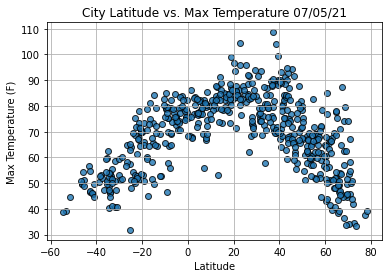

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

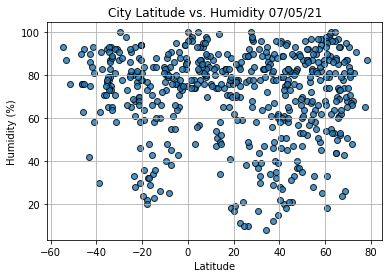

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

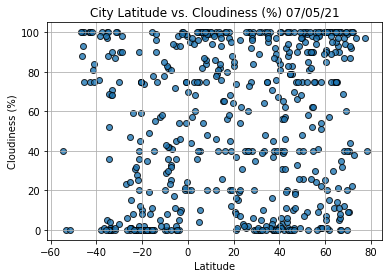

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

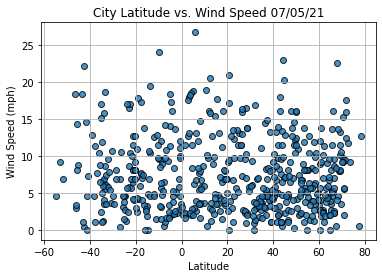

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()